<a href="https://colab.research.google.com/github/HeitorFrainer/googlecolab/blob/main/heat_eq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace
from scipy.integrate import solve_ivp

In [ ]:
# grid
nx = 50
ny = 50
dx = 0.001
dy = 0.001
alpha = 0.000117
T_initial = 30.0
T = np.full((nx , ny) , T_initial)
T[20:30, 20:30] = 90.0
T

array([[30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       ...,
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.],
       [30., 30., 30., ..., 30., 30., 30.]])

In [ ]:
# heat equation
def heat_eq(t , y):
  T = y.reshape((nx, ny))
  dTdt = (alpha / dx**2) * laplace(T)
  dTdt[20:30, 20:30] = 0
  dTdt[0,:] = dTdt[-1,:] = 0
  dTdt[:,0] = dTdt[:,-1] = 0
  return dTdt.flatten()

In [ ]:
# solv
sol = solve_ivp(heat_eq, [0, 2.0], T.flatten(), method='RK45')
T_final = sol.y[:, -1].reshape((nx, ny))
T_final

array([[30.        , 30.        , 30.        , ..., 30.        ,
        30.        , 30.        ],
       [30.        , 30.10586538, 30.21090302, ..., 30.21090302,
        30.10586538, 30.        ],
       [30.        , 30.21090302, 30.42355641, ..., 30.42355641,
        30.21090302, 30.        ],
       ...,
       [30.        , 30.21090302, 30.42355641, ..., 30.42355641,
        30.21090302, 30.        ],
       [30.        , 30.10586538, 30.21090302, ..., 30.21090302,
        30.10586538, 30.        ],
       [30.        , 30.        , 30.        , ..., 30.        ,
        30.        , 30.        ]])

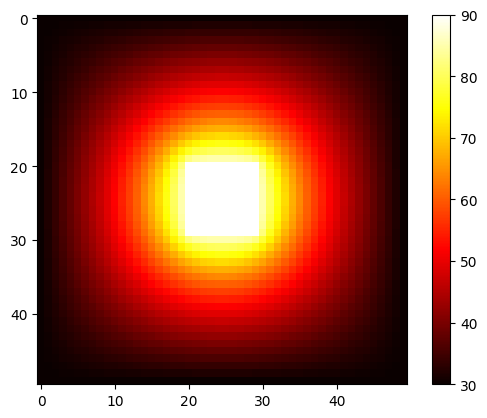

In [ ]:
#view
plt.imshow(T_final, cmap='hot', vmin=30, vmax=90)
plt.colorbar()
plt.show()

In [ ]:
# save
df = pd.DataFrame(T_final)
df.to_csv('T_final.csv')
df.shape

(50, 50)